## Part A-3

In [2]:
import math
import numpy as np

def ik(px,py,pz):
    # constants
    L1 = 15
    L2 = 105
    L3 = (55.95+57.75)
    L4 = 12.31

    # swtich to r1 home frame
    x_e = px * 1000
    y_e = py * 1000 + 98
    z_e = pz * 1000 - 100

    print(x_e, y_e, z_e)

    # theta3
    d = math.sqrt(x_e**2 + y_e**2 + z_e**2 - L1**2)
    print(L3**2 + L4**2 + L2**2)
    print(d)
    beta = math.acos((L3**2 + L4**2 + L2**2 - d**2)/(2 * L2 * math.sqrt(L3**2 + L4**2)))
    eta = math.atan(L4 / L3)
    delta = math.pi - beta
    # How do we tell the difference?
    print(f"{math.pi}, beta: {beta}, eta: {eta}")
    theta3_elbow_down = math.pi - beta + eta
    theta3_elbow_up = math.pi + beta + eta
    theta3_elbow_up = theta3_elbow_up - 2 * math.pi if theta3_elbow_up >= 2 * math.pi - 1e-5 else theta3_elbow_up

    # theta2
    EB = math.sqrt(x_e**2 + z_e**2)
    EC = math.sqrt(L3**2+L4**2) * math.sin(delta)
    d = math.sqrt(EB**2 - EC**2)
    m = math.sqrt(x_e**2 + y_e**2 + z_e**2 - EC**2)
    phi = math.acos(abs(y_e)/m)
    alpha = math.acos(L1 / m)
    theta2 = -(alpha - phi) # direction of theta2 is opposite

    # theta1
    CK = math.sqrt(m**2 - L1**2)
    DK = L1 * math.tan(theta2)  # When theta2 is negative, DK will be negative, too
    DC = CK + DK
    print(f"CK={CK},DK={DK},DC={DC}")
    BO = DC*math.cos(theta2)
    AO = math.sqrt(x_e**2 + z_e**2)
    print(f"AO={AO},BO={BO}")
    epsilon = math.acos(BO/AO)
    gamma = math.atan(-z_e/x_e)
    print(f"epsilon: {epsilon*180/np.pi}, gamma: {gamma*180/np.pi}")
    theta1_elbow_up = -epsilon + gamma
    theta1_elbow_down = epsilon + gamma # direction of theta1 is opposite

    return [theta1_elbow_down, theta2, theta3_elbow_down]

## Part A-4

In [3]:
def PoE_3D(theta1, theta2, theta3):
    M = np.array([
        [1, 0, 0, (105 + 55.95 + 57.75)/1000],
        [0, 1, 0, (-98 + (-15))/1000],
        [0, 0, 1, (100 - 12.31)/1000],
        [0, 0, 0, 1]
    ])
    omega_1 = np.array([0,1,0])
    omega_2 = np.array([0,0,1])
    omega_3 = np.array([0,-1,0])

    q_1 = np.array([0,-98,100])/1000
    q_2 = np.array([0,-98,100])/1000
    q_3 = np.array([105,-113,100])/1000

    v_1 = - np.cross(omega_1,q_1)
    v_2 = - np.cross(omega_2,q_2) 
    v_3 = - np.cross(omega_3,q_3) 
    
    S1 = mr.MatrixExp6(mr.VecTose3(np.concatenate((omega_1,v_1),axis=0))*theta1)
    S2 = mr.MatrixExp6(mr.VecTose3(np.concatenate((omega_2,v_2),axis=0))*theta2)
    S3 = mr.MatrixExp6(mr.VecTose3(np.concatenate((omega_3,v_3),axis=0))*theta3)

    T_05 = S1.dot(S2).dot(S3).dot(M)
    return T_05

In [126]:
PoE_3D(-30*np.pi/180,-20*np.pi/180,30*np.pi/180)

array([[ 0.45476947,  0.29619813, -0.83991154,  0.14305238],
       [-0.29619813,  0.93969262,  0.17101007, -0.18379037],
       [ 0.83991154,  0.17101007,  0.51507684,  0.23592606],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [115]:
import modern_robotics as mr

# Initial configuraiton (0, 0, 7)
Xstart = PoE_3D(0,0,7*np.pi/180)
#（-30，0， 7）
X1 = PoE_3D(-30*np.pi/180,0,7*np.pi/180)
# (-30, -20, 7)
X2 = PoE_3D(-30*np.pi/180,-20*np.pi/180,7*np.pi/180)
# (-30, -30, 20)
X3 = PoE_3D(-30*np.pi/180,-30*np.pi/180,20*np.pi/180)
# (-30,-20, 30)
Xend = PoE_3D(-30*np.pi/180,-20*np.pi/180,30*np.pi/180)

Xs = [Xstart, X1, X2, X3, Xend]
Tf = 5
N = 50
method = 5

traj = []
for i in range(4):
    traj = traj + mr.CartesianTrajectory(Xs[i], Xs[i+1], Tf, N, method)


In [122]:
X = []
Y = []
Z = []

for i in range(len(traj)):
    X.append(traj[i][:,3][0])
    Y.append(traj[i][:,3][1])
    Z.append(traj[i][:,3][2])

In [ ]:
print([X,Y,Z])

In [72]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [127]:
a_file = open("Lab3_Trajectory.txt", "w")
np.savetxt(a_file, [X,Y,Z])
a_file.close()

In [19]:
loaded_trajectory = np.loadtxt("Lab3_Trajectory.txt")

In [25]:
lines = []
with open("Lab3_Trajectory.txt") as textFile:
    lines = [line.split() for line in textFile]

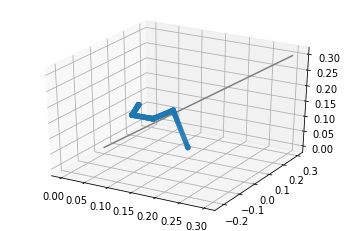

In [128]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 0.3, 100)
xline = np.linspace(0, 0.3, 100)
yline = np.linspace(0, 0.3, 100)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(X, Y, Z, cmap='Greens');

## Part A-5

In [ ]:
trj_joints1 = []
for i in range(200):
    x = X[i]
    y = Y[i]
    z = Z[i]
    print(f"(i={i}:{x},{y},{z})")
    thetas = ik(x,y,z)
    print(f"(i={i}:{x},{y},{z},{[xt*180/np.pi for xt in thetas]}")
    trj_joints1.append(thetas)


In [31]:
import modern_robotics as mr
import math
def MyJaco(thetalist):
    t1, t2 = thetalist[0], thetalist[1]
    J1 = np.array([0, 1, 0, -100, 0, 0])
    J2 = np.array([np.sin(t1), 0, np.cos(t1), -98*np.cos(t1), 100*np.sin(t1), 98*np.sin(t1)])
    J3 = np.array([np.cos(t1)*np.sin(t2), -np.cos(t2), -np.sin(t1)*np.sin(t2), -105*np.sin(t1)+98*np.sin(t1)*np.sin(t2)+100*np.cos(t2), 100*np.cos(t1)*np.sin(t2), -105*np.cos(t1) + 98*np.cos(t1)*np.sin(t2)])
    return np.array([J1, J2, J3]).T

In [32]:
S1 = np.array([0, 1, 0, -100, 0, 0])
S2 = np.array([0, 0, 1, -98, 0, 0])
S3 = np.array([0, -1, 0, 100, 0, -105])
thetalist = np.array([40, 454, 10])
thetalist = thetalist * np.pi / 180

mr.JacobianSpace(np.array([S1, S2, S3]).T, thetalist)
MyJaco(thetalist)

array([[ 0.00000000e+00,  6.42787610e-01,  7.64178397e-01],
       [ 1.00000000e+00,  0.00000000e+00,  6.97564737e-02],
       [ 0.00000000e+00,  7.66044443e-01, -6.41221811e-01],
       [-1.00000000e+02, -7.50723554e+01, -1.16286089e+01],
       [ 0.00000000e+00,  6.42787610e+01,  7.64178397e+01],
       [ 0.00000000e+00,  6.29931857e+01, -5.54518359e+00]])

In [33]:
MyJaco(thetalist)

array([[ 0.00000000e+00,  6.42787610e-01,  7.64178397e-01],
       [ 1.00000000e+00,  0.00000000e+00,  6.97564737e-02],
       [ 0.00000000e+00,  7.66044443e-01, -6.41221811e-01],
       [-1.00000000e+02, -7.50723554e+01, -1.16286089e+01],
       [ 0.00000000e+00,  6.42787610e+01,  7.64178397e+01],
       [ 0.00000000e+00,  6.29931857e+01, -5.54518359e+00]])

In [37]:
for i in range(4):
    thetalist = np.random.uniform(0, 2*np.pi, (3, ))
    Jexp = mr.JacobianSpace(np.array([S1, S2, S3]).T, thetalist)
    Jact = MyJaco(thetalist)
    # print(Jexp)
    # print(Jact)
    print(np.isclose(Jexp, Jact))
    print("================")

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
